In [203]:
import pandas as pd
import numpy as np
import os
import config

In [204]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [205]:
has_colibactin = pd.read_csv(os.path.join(config.CLEAN_DIR, "has_colibactin.to_csv"), index_col=0)
has_colibactin = has_colibactin.loc[metadata.index]
has_colibactin

,Bins
Sample_ID,
magic.0001,False
magic.0004,False
magic.0006,True
magic.0007,True
magic.0008,False
...,...
magic.6595,False
magic.6597,False
magic.6598,False


In [206]:
all(has_colibactin.index == metadata.index)

True

In [207]:
metadata["has_colibactin"] = has_colibactin
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,has_colibactin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,False
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,False
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,True
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,True
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,False
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,False
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,False


In [6]:
df = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
df = df.T
df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,105,228,39403,925,170947,3011,2,163,4,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,1,144,23646,537,107325,726,1,62,1,0,...,0,0,0,0,0,0,0,0,0,0
magic.0010,3533,148,26439,2166,19611,28972,0,784,32,0,...,0,0,0,0,0,0,0,0,0,0
magic.0012,58,526,80131,1518,367871,2149,3,175,390,27,...,0,0,0,0,0,0,0,0,0,0
magic.0014,44507,15062,760790,5379,34244,5542,1,662,766,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,7,312,283,7,64,17,3,3,2,10,...,0,0,0,0,0,0,0,0,0,0
magic.6597,6,7,31,9,60,13,0,1,7,1,...,0,0,0,0,0,0,0,0,0,0
magic.6598,6,14,2493,43,219,83,0,12,12,1,...,0,0,0,0,0,0,0,0,0,1
magic.6599,7,8,1280,87,758,339,0,21,3,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
in_both = list(set(df.index) & set(metadata.index))

In [8]:
corr_df = df.loc[in_both]
corr_df["has_colibactin"] = metadata.loc[in_both]["has_colibactin"]
corr_df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,has_colibactin
magic.5502,9,19,197,3,834,8,0,0,14,6,...,0,0,0,0,0,0,0,0,0,False
magic.2054,45,245,9222,186,903,388,0,73,19,0,...,0,0,0,0,0,0,0,0,0,True
magic.4687,30,4,371,11,130,114,0,6,16,71,...,0,0,0,0,0,0,0,0,0,False
magic.1611,21,82,866,28,221,60,0,5,0,6,...,0,0,0,0,0,0,0,0,0,False
magic.0808,1,90,38553,3968,32544,47902,0,1392,64,24,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.2952,4,29,12173,1355,10332,14920,3,527,0,0,...,0,0,0,0,0,0,0,0,0,False
magic.3732,90,750,559,8,136,58,47,1,24662,121,...,0,0,0,0,0,0,0,0,0,False
magic.1225,1017,89,3338,69,345,141,0,15,12600,43,...,0,0,0,0,0,0,0,0,0,True
magic.3098,51,162,37109,739,4486,1262,1,211,1,6,...,0,0,0,0,0,0,0,0,0,True


In [9]:
from tqdm import tqdm

corr = {}

for col in tqdm(corr_df.columns):
#     corr[col] = np.stats.corr(corr_df[col], corr_df["has_colibactin"])
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 12107/12107 [00:07<00:00, 1690.52it/s]


In [10]:
taxa_corr = pd.DataFrame(corr, index=['corr']).T
taxa_corr.sort_values("corr", ascending=False).head(20)

,corr
has_colibactin,1.000000
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,0.267708
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__CAG-238;s__CAG-238_sp900551415,0.207167
k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-74;g__SFMI01;s__SFMI01_sp004556155,0.183357
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_sp900546335,0.177939
k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Corynebacterium;s__Corynebacterium_heidelbergense,0.166688
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_sp004557285,0.165113
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales_A;f__UBA1381;g__CAG-41;s__CAG-41_sp001941225,0.162477
k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__CFH-S0501;s__CFH-S0501_sp004521915,0.134425
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Yersinia;s__Yersinia_pestis,0.132173


In [121]:
taxa_corr.sort_values("corr", ascending=True).head(20)

,corr
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__CAG-590;s__CAG-590_sp900548855,-0.088547
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_sp900556845,-0.084511
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium_A;s__Lachnoclostridium_A_edouardi,-0.082209
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides;s__Parabacteroides_sp900552415,-0.079663
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides_bouchesdurhonensis,-0.078640
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_sp900557085,-0.078547
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_vulgatus,-0.075924
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides_caecimuris,-0.075694
k__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Erysipelatoclostridium;s__Erysipelatoclostridium_sp000752095,-0.074281
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Butyricicoccaceae;g__Agathobaculum;s__Agathobaculum_butyriciproducens,-0.073629


In [278]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
temp_meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t")
CAG.columns = temp_meta["Sample_ID"]
CAG = CAG.T
CAG

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [358]:
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [883]:
corr_df = pd.DataFrame()
corr_df["phage_sum"] = CAG[putative_phages].sum(axis=1)
corr_df["Phage richness"] = (CAG[putative_phages] > 0).sum(axis=1)
corr_df["CAG_sum"] = CAG.sum(axis=1)
corr_df["MGS_sum"] = CAG.iloc[:, :150].sum(axis=1)
corr_df["MGS richness"] = (CAG.iloc[:, :150] > 0.000001).sum(axis=1)
corr_df["phage_ratio"] = corr_df["phage_sum"] / corr_df["CAG_sum"]
corr_df

,phage_sum,Phage richness,CAG_sum,MGS_sum,MGS richness,phage_ratio
Sample_ID,,,,,,
magic.0001,0.001230,36,0.129141,0.000250,2,0.009524
magic.0004,0.001222,38,0.141517,0.000192,3,0.008632
magic.0006,0.000004,3,0.008310,0.000020,1,0.000530
magic.0007,0.001906,77,0.093563,0.000197,6,0.020376
magic.0008,0.000850,61,0.037040,0.000055,1,0.022939
...,...,...,...,...,...,...
magic.6595,0.003560,69,0.342816,0.002603,47,0.010386
magic.6597,0.003450,88,0.490848,0.001563,40,0.007030
magic.6598,0.003315,59,0.202724,0.002044,35,0.016352


In [884]:
all(CAG.index) == all(metadata.index)

True

In [885]:
metadata["date_time"] = pd.to_datetime(metadata["Date_Collected"])

In [886]:
counts.iloc[:145]

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG00141,1069
CAG00142,1046
CAG00143,1035


In [887]:
corr_df["has_colibactin"] = metadata["has_colibactin"]

In [888]:
from scipy.stats import ranksums
# from scipy.stats import wilcoxon


# for week in metadata["Timeline_Weeks"].unique():
#     print(week)
#     week_df = corr_df[metadata["Timeline_Weeks"] == week]

corr_df2 = corr_df.copy()
# corr_df2 = corr_df2[~metadata["Timeline_Weeks"].isna()]
    
has = corr_df2[metadata["has_colibactin"]]
no_has = corr_df2[~metadata["has_colibactin"]]

# has = week_df[metadata["has_colibactin"]]
# no_has = week_df[~metadata["has_colibactin"]]

info_dict = []

for col in tqdm(corr_df.columns):
    info = ranksums(has[col], no_has[col])

#     info = wilcoxon(group1, group2)

    info_dict.append({
        "CAG" : col,
        "stat" : info.statistic,
        "pvalue" : info.pvalue
    })

CAG_df = pd.DataFrame(info_dict)
CAG_df = CAG_df.set_index("CAG")
CAG_df["sig"] = CAG_df["pvalue"] < 0.05


display(CAG_df)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 879.86it/s]


,stat,pvalue,sig
CAG,,,
phage_sum,9.323093,1.129970e-20,True
Phage richness,9.415077,4.727372e-21,True
CAG_sum,5.196029,2.035901e-07,True
MGS_sum,-2.829472,4.662490e-03,True
MGS richness,-2.831636,4.631048e-03,True
phage_ratio,8.940692,3.867403e-19,True
has_colibactin,47.098342,0.000000e+00,True


In [889]:
# ? plt.boxplot

In [890]:
ranksums(has["MGS richness"], no_has["MGS richness"])

RanksumsResult(statistic=-2.831636369513034, pvalue=0.004631048122494608)

In [891]:
has["MGS_sum"].median(), no_has["MGS_sum"].median()

(0.000256819176, 0.00027783782350000003)

In [892]:
has["MGS richness"].median(), no_has["MGS richness"].median()

(9.0, 10.0)

In [915]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

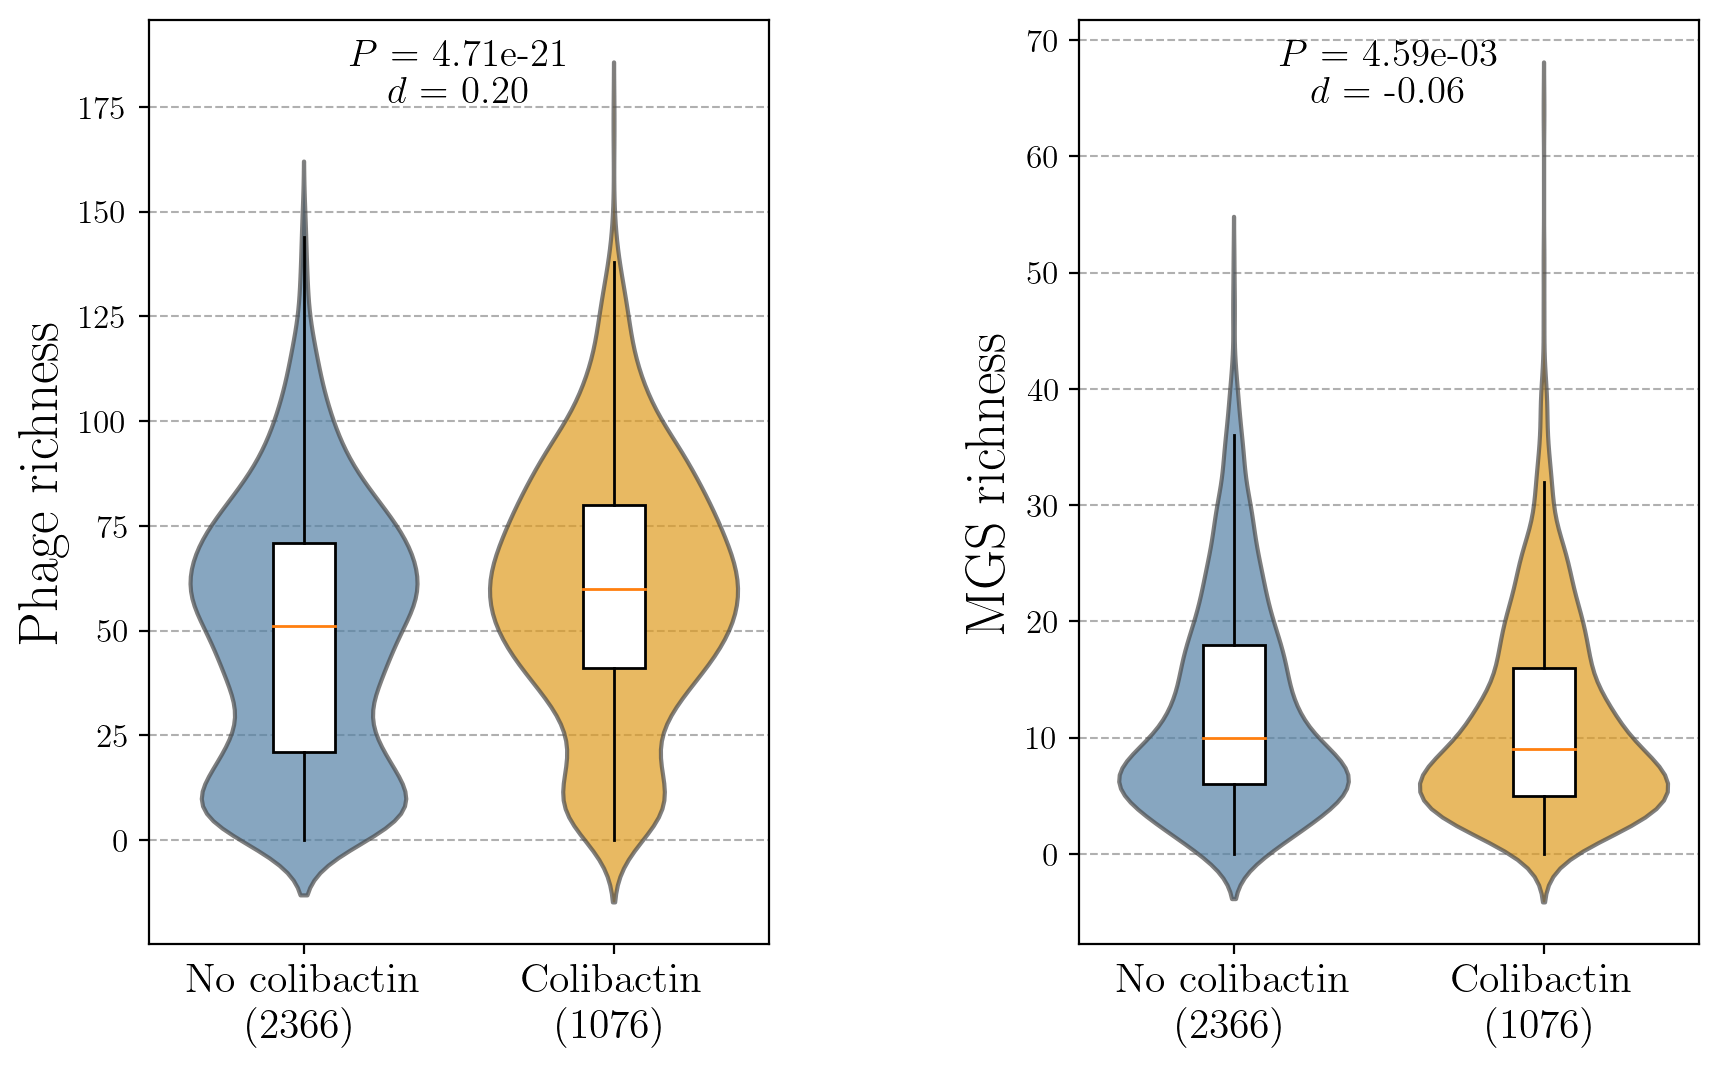

In [927]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import mannwhitneyu

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axs = plt.subplots(ncols=2, figsize=(10, 6), dpi=200)
for ind, ax in zip(["Phage richness", "MGS richness"], axs):
# for ind, ax in zip(["MGS_richness", "MGS_sum"], axs):
    v = sns.violinplot(x="has_colibactin", y=ind, data=corr_df2, ax=ax, inner=None,
                   palette={True: "orange", False : "steelblue"})
    plt.setp(ax.collections, alpha=0.7)
    
    a, b = corr_df2[~corr_df2["has_colibactin"]][ind], corr_df2[corr_df2["has_colibactin"]][ind]
    
    box = ax.boxplot([a, b], 
                     patch_artist=True,
               positions=[0, 1], showfliers=False, widths=0.2, 
               capwidths=0,
               boxprops=dict(facecolor="white")
    )
    
    cliffs_delta, man_whitney_u_p_val = observeDifference(b, a)
    
    p_text = (r"$P <$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"$P$ = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    num_has = has.shape[0]
    num_no_has = no_has.shape[0]
    
    ax.set_xticks([0, 1], labels=[f"No colibactin\n({num_no_has})", f"Colibactin\n({num_has})"])
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"$d$ = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, "colibactin_phages.pdf"))

In [935]:
ranksums(metadata[metadata["has_colibactin"]]["depth"], metadata[~metadata["has_colibactin"]]["depth"])

RanksumsResult(statistic=7.013720137930892, pvalue=2.320633672539355e-12)

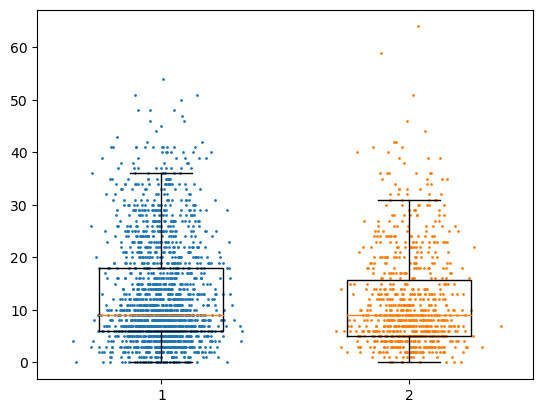

In [567]:
measure = "MGS_richness"

plt.scatter(np.ones(no_has.shape[0]) + np.random.normal(scale=0.1, size=no_has.shape[0]), no_has[measure], s=1)
plt.scatter(2 * np.ones(has.shape[0]) + np.random.normal(scale=0.1, size=has.shape[0]), has[measure], s=1)

# plt.ylim(-0.0001, 0.001)
# plt.ylim(-1, 50)
# plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5, showmeans=True, meanline=True)
plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5)

plt.show()

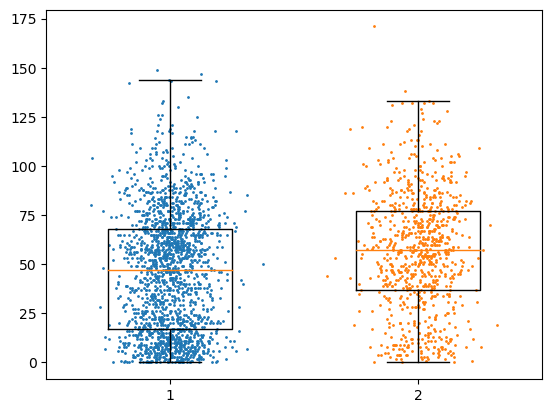

In [569]:
measure = "phage_richness"

plt.scatter(np.ones(no_has.shape[0]) + np.random.normal(scale=0.1, size=no_has.shape[0]), no_has[measure], s=1)
plt.scatter(2 * np.ones(has.shape[0]) + np.random.normal(scale=0.1, size=has.shape[0]), has[measure], s=1)

# plt.ylim(-0.0002, 0.01)
plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5)
plt.show()

In [277]:
CAG_df[CAG_df["pvalue"] * 27818 < 0.05]

,stat,pvalue
CAG,,
CAG00009,20.813792,3.246254e-96
CAG00031,-4.850000,1.234616e-06
CAG00153,13.171210,1.285217e-39
CAG00171,22.622750,2.588307e-113
CAG00243,8.611368,7.219355e-18
...,...,...
CAG27739,7.371664,1.685115e-13
CAG27757,17.015219,6.333582e-65
CAG27782,14.415613,4.127556e-47


In [220]:
CAG_df.sort_values("stat")

,stat,pvalue
CAG,,
CAG17709,-5.641553,1.685228e-08
CAG02277,-5.321202,1.030837e-07
CAG02607,-5.030803,4.884293e-07
CAG17347,-5.015429,5.291513e-07
CAG21970,-4.921633,8.582505e-07
...,...,...
CAG21731,26.832770,1.340283e-158
CAG09312,27.402412,2.566885e-165
CAG00734,28.354918,7.279292e-177


In [241]:
pairs = []

for rel in tqdm(ass):
    host = rel["host"]
    dep = rel["dependent"]
#     if CAG_df.loc[dep]["pvalue"] < 0.05 and CAG_df.loc[host]["pvalue"] < 0.05:
#         display(CAG_df.loc[[host, dep]])
#         input()
    if CAG_df.loc[dep]["stat"] > 0 and CAG_df.loc[host]["stat"] < 0:
        if CAG_df.loc[dep]["pvalue"] < 0.05 and CAG_df.loc[host]["pvalue"] < 0.05:
            pairs.append((host, dep))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 330315/330315 [00:13<00:00, 24870.71it/s]


In [243]:
print(pairs)

[('CAG10851', 'CAG04805'), ('CAG12325', 'CAG02989'), ('CAG21970', 'CAG25703'), ('CAG22625', 'CAG25703'), ('CAG22842', 'CAG25703')]


In [246]:
for p in pairs:
    display(CAG_df.loc[list(p)])

,stat,pvalue
CAG,,
CAG10851,-2.420393,0.015504
CAG04805,2.525179,0.011564


,stat,pvalue
CAG,,
CAG12325,-2.152694,0.031343
CAG02989,2.085020,0.037067


,stat,pvalue
CAG,,
CAG21970,-4.921633,8.582505e-07
CAG25703,2.226936,2.595157e-02


,stat,pvalue
CAG,,
CAG22625,-4.313084,0.000016
CAG25703,2.226936,0.025952


,stat,pvalue
CAG,,
CAG22842,-2.714197,0.006644
CAG25703,2.226936,0.025952


In [249]:
clusters.loc["CAG25703"]

,1
0,
CAG25703,UniRef90_K1FQM0
CAG25703,UniRef90_A0A0I9S2X6


0.5060827250608273

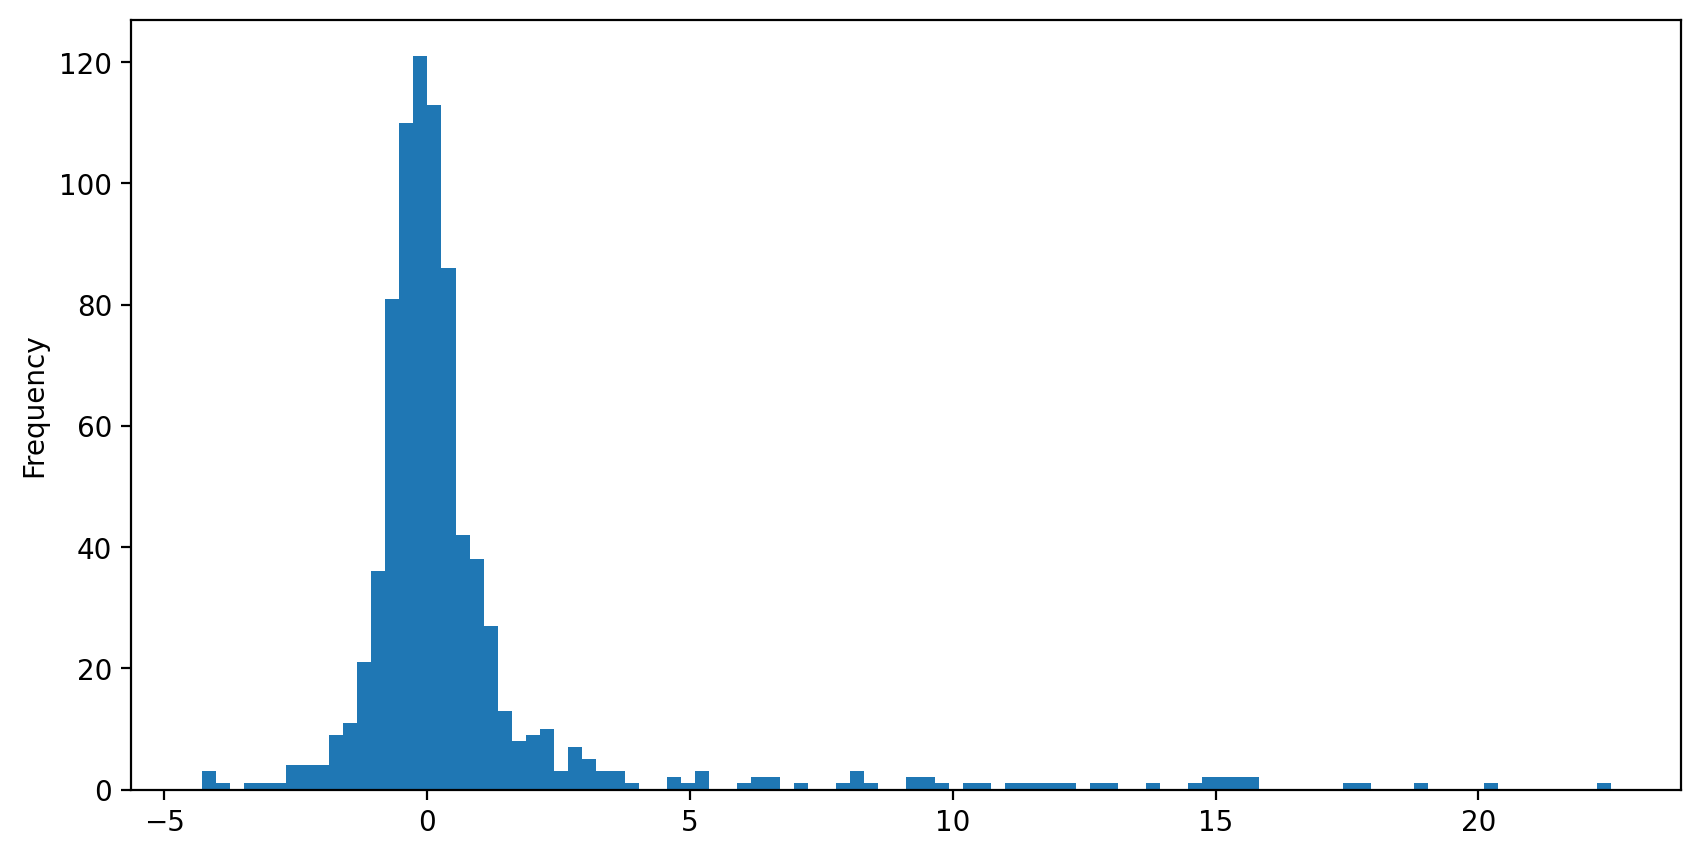

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=200)
CAG_df.loc[putative_phages]['stat'].plot.hist(bins=100)
(CAG_df.loc[putative_phages]['stat'] > 0).mean()

In [24]:
corr_df = CAG.copy()
corr_df["has_colibactin"] = metadata["has_colibactin"]
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0,False
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0,False
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0,True
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0,True
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,False
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0,False
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,False


In [200]:
from tqdm import tqdm

corr = {}

at_time = corr_df[metadata["Timeline_Weeks"] == "0"]

for col in tqdm(corr_df.columns):
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 27826/27826 [00:15<00:00, 1809.45it/s]


In [201]:
CAG_corr = pd.DataFrame(corr, index=['corr']).T
CAG_corr

,corr
CAG00001,0.015252
CAG00002,0.014914
CAG00003,0.036216
CAG00004,-0.009567
CAG00005,-0.033739
...,...
phage_ratio,0.117644
total_CAG_abundance,0.016132
host_sum,0.031419
dependent_sum,0.054365


In [144]:
CAG_corr.sort_values("corr", ascending=False).head(20)

,corr
has_colibactin,1.000000
CAG01095,0.403788
CAG00734,0.361905
CAG21731,0.340604
CAG15194,0.337409
CAG04862,0.325192
CAG02176,0.323253
CAG12360,0.322209
CAG00397,0.317339
CAG24486,0.317237


In [141]:
CAG_corr

,corr
CAG00001,0.076602
CAG00002,NaN
CAG00003,-0.063360
CAG00004,-0.048125
CAG00005,NaN
...,...
phage_ratio,0.059885
total_CAG_abundance,0.086929
host_sum,0.121944
dependent_sum,0.099935


In [138]:
clusters.loc["CAG12883"]

,1
0,
CAG12883,UniRef90_U9XWS2
CAG12883,UniRef90_A0A2X3KA43
CAG12883,UniRef90_W1F359


In [37]:
corr_df["depth"] = metadata["depth"]
corr_df.head()

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin,phage_sum,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000,0.000019,0.0,0.0,0.000000,2.474750e-06,0.0,False,0.001230,1544781
magic.0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000,0.000005,0.0,0.0,0.000000,2.309360e-06,0.0,False,0.001222,1167038
magic.0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,9.946710e-07,0.0,True,0.000004,1720636
magic.0007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.519240e-06,0.0,...,0.000045,0.000007,0.0,0.0,0.000146,1.886600e-05,0.0,True,0.001906,6825017
magic.0008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.104770e-07,0.0,...,0.000020,0.000000,0.0,0.0,0.000089,5.444550e-06,0.0,False,0.000850,2928044


In [25]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [26]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [27]:
phage_set = set(list(phage.values.flatten()))
phage_set

{'UniRef90_A0A379BE83',
 'UniRef90_A0A4Z0BDZ1',
 'UniRef90_A0A0Q5WDD4',
 'UniRef90_A0A1B9AL93',
 'UniRef90_UPI001562F484',
 'UniRef90_A0A0C5HAP4',
 'UniRef90_K7WU34',
 'UniRef90_Q90Q89',
 'UniRef90_A0A0S3UGH2',
 'UniRef90_A0A2Z4BST7',
 'UniRef90_UPI0020BF6C2C',
 'UniRef90_A0A1I5SXA0',
 'UniRef90_A0A1G1WI54',
 'UniRef90_B4XU20',
 'UniRef90_A0A0S2SJQ0',
 'UniRef90_UPI000F03202E',
 'UniRef90_UPI0003D2A46C',
 'UniRef90_UPI002169236D',
 'UniRef90_A0A7V8JG30',
 'UniRef90_A0A2D1GGA9',
 'UniRef90_A0A6C0BDC2',
 'UniRef90_V5XYH8',
 'UniRef90_A0A482MDD8',
 'UniRef90_A0A379C6J4',
 'UniRef90_A0A843FMJ5',
 'UniRef90_A0A6M3JR57',
 'UniRef90_A0A8A1VH58',
 'UniRef90_A0A1H6MPR3',
 'UniRef90_A0A873WPQ9',
 'UniRef90_A0A6H1Z513',
 'UniRef90_B2MJ07',
 'UniRef90_A0A6J7WLU5',
 'UniRef90_UPI00037673B2',
 'UniRef90_A0A6P0I7Z2',
 'UniRef90_A0A3G3M988',
 'UniRef90_X1JZT8',
 'UniRef90_A0A3G8G2H8',
 'UniRef90_Q73986',
 'UniRef90_A0A8C4Z3A5',
 'UniRef90_A0A6G6XI73',
 'UniRef90_A0A6J5M6K8',
 'UniRef90_D5B9S4',
 'UniR

In [28]:
phage_content = {}
for c in tqdm(CAG.columns):
    phages = 0
    for g in clusters.loc[c].values.flatten():
        if g in phage_set:
            phages += 1
    phage_content[c] = phages / clusters.loc[c].shape[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 27818/27818 [00:02<00:00, 9923.99it/s]


In [29]:
phage_prop = pd.DataFrame(phage_content, index=['phage_prop']).T
phage_prop

,phage_prop
CAG00001,0.000172
CAG00002,0.001141
CAG00003,0.001252
CAG00004,0.000816
CAG00005,0.003375
...,...
CAG27814,0.000000
CAG27815,0.000000
CAG27816,0.000000
CAG27817,0.000000


In [261]:
putative_phages = phage_prop[phage_prop["phage_prop"] >= 0.25].index
putative_phages

Index(['CAG00530', 'CAG00574', 'CAG00775', 'CAG00831', 'CAG00890', 'CAG00892',
       'CAG01038', 'CAG01064', 'CAG01122', 'CAG01154',
       ...
       'CAG27151', 'CAG27173', 'CAG27198', 'CAG27222', 'CAG27238', 'CAG27276',
       'CAG27447', 'CAG27469', 'CAG27655', 'CAG27818'],
      dtype='object', length=822)

In [170]:
counts = clusters.groupby(level=0).count()
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [171]:
corr_vs_phage_content = CAG_corr.loc[putative_phages].copy()
corr_vs_phage_content["phage_prop"] = phage_prop.loc[putative_phages]
corr_vs_phage_content["size"] = counts.loc[putative_phages]
corr_vs_phage_content

,corr,phage_prop,size
CAG00530,0.038761,0.268293,82
CAG00574,0.032166,0.438356,73
CAG00775,-0.023348,0.300000,50
CAG00831,0.007935,0.282609,46
CAG00890,0.025634,0.372093,43
...,...,...,...
CAG27276,-0.023855,0.500000,2
CAG27447,0.036554,0.500000,2
CAG27469,-0.005840,0.500000,2
CAG27655,-0.014461,0.500000,2


In [186]:
corr_vs_phage_content.sort_values("size", ascending=False).head(20)

,corr,phage_prop,size
CAG00530,0.038761,0.268293,82
CAG00574,0.032166,0.438356,73
CAG00775,-0.023348,0.300000,50
CAG00831,0.007935,0.282609,46
CAG00890,0.025634,0.372093,43
CAG00892,0.002339,0.348837,43
CAG01038,-0.017165,0.270270,37
CAG01064,0.002176,0.444444,36
CAG01122,0.011484,0.314286,35
CAG01154,-0.008883,0.323529,34


In [176]:
corr_vs_phage_content.corr()

,corr,phage_prop,size
corr,1.000000,0.013996,-0.028919
phage_prop,0.013996,1.000000,-0.207003
size,-0.028919,-0.207003,1.000000


In [184]:
clusters.loc["CAG08990"]

,1
0,
CAG08990,UniRef90_UPI000B427BE6
CAG08990,UniRef90_A0A376TEG8
CAG08990,UniRef90_P04132
CAG08990,UniRef90_P07695
CAG08990,UniRef90_A0A2X1KC23


In [188]:
CAG_corr.sort_values("corr")

,corr
CAG17709,-0.088182
CAG04647,-0.084106
CAG17347,-0.081980
CAG09965,-0.080887
CAG07910,-0.080804
...,...
CAG15194,0.337409
CAG21731,0.340604
CAG00734,0.361905
CAG01095,0.403788


In [202]:
for rel in ass_dict_retained:
    host, dep = rel["host"], rel["dependent"]
    host_corr = CAG_corr.loc[host]["corr"]
    dep_corr =  CAG_corr.loc[dep]["corr"]
    if host_corr < -0.01 and dep_corr > 0.01:
        print(host, host_corr)
        print(dep, dep_corr)
        print()

CAG00031 -0.05534301566239875
CAG07049 0.020376080652507025

CAG00082 -0.016776990153978856
CAG00409 0.010828938992058616

CAG00082 -0.016776990153978856
CAG00456 0.010920757717438258

CAG00082 -0.016776990153978856
CAG00580 0.011791417081542502

CAG00082 -0.016776990153978856
CAG00582 0.03564258831118279

CAG00170 -0.01469328552284659
CAG04915 0.021768829540255642

CAG00189 -0.023006831966117816
CAG00409 0.010828938992058616

CAG00189 -0.023006831966117816
CAG00456 0.010920757717438258

CAG00189 -0.023006831966117816
CAG00580 0.011791417081542502

CAG00189 -0.023006831966117816
CAG00582 0.03564258831118279

CAG00195 -0.026203377082624518
CAG00060 0.014796470506796106

CAG00322 -0.016197342763881465
CAG05450 0.024171080707145715

CAG00322 -0.016197342763881465
CAG07351 0.02238724932825353

CAG00372 -0.03230261635331976
CAG01360 0.01023333837498232

CAG00410 -0.011102737846147293
CAG02442 0.022509798532604527

CAG00410 -0.011102737846147293
CAG08645 0.019746051134190194

CAG00537 -0.039

In [77]:
corr_df["phage_sum"] = (CAG.loc[in_both][putative_phages]).sum(axis=1)
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin,phage_sum,depth,phage_ratio
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0,False,0.001230,1544781,0.009524
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0,False,0.001222,1167038,0.008632
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0,True,0.000004,1720636,0.000530
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0,True,0.001906,6825017,0.020376
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0,False,0.000850,2928044,0.022939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,False,0.003560,1562968,0.010386
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0,False,0.003450,2113880,0.007030
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,False,0.003315,1650388,0.016352


In [80]:
corr_df["total_CAG_abundance"] = (CAG.loc[in_both]).sum(axis=1)
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818,has_colibactin,phage_sum,depth,phage_ratio,total_CAG_abundance
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,2.474750e-06,0.0,False,0.001230,1544781,0.009524,0.129141
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,2.309360e-06,0.0,False,0.001222,1167038,0.008632,0.141517
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,9.946710e-07,0.0,True,0.000004,1720636,0.000530,0.008310
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.0,0.000000,0.000146,1.886600e-05,0.0,True,0.001906,6825017,0.020376,0.093563
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.0,0.000000,0.000089,5.444550e-06,0.0,False,0.000850,2928044,0.022939,0.037040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.0,0.000000,0.000000,0.000000e+00,0.0,False,0.003560,1562968,0.010386,0.342816
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.0,0.000021,0.000000,0.000000e+00,0.0,False,0.003450,2113880,0.007030,0.490848
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.0,0.000000,0.000000,0.000000e+00,0.0,False,0.003315,1650388,0.016352,0.202724


In [81]:
corr_df[["has_colibactin", "phage_sum", "depth", "total_CAG_abundance"]].corr()

,has_colibactin,phage_sum,depth,total_CAG_abundance
0,,,,
has_colibactin,1.000000,0.123084,0.106996,0.016132
phage_sum,0.123084,1.000000,0.000319,0.525227
depth,0.106996,0.000319,1.000000,-0.180126
total_CAG_abundance,0.016132,0.525227,-0.180126,1.000000


In [120]:
for t in metadata["Timeline_Weeks"].unique():
    print(t)
    at_t = metadata[metadata["Timeline_Weeks"] == t].index
    display(corr_df.loc[at_t][["has_colibactin", "phage_sum", "depth", "total_CAG_abundance", "phage_host_ratio", "dependent_sum"]].corr())
    input()

0


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.081313,0.050970,0.086929,-0.060951,0.099935
phage_sum,0.081313,1.000000,0.127531,0.575533,-0.051690,0.642528
depth,0.050970,0.127531,1.000000,-0.004090,0.090123,0.105904
total_CAG_abundance,0.086929,0.575533,-0.004090,1.000000,-0.135872,0.721412
phage_host_ratio,-0.060951,-0.051690,0.090123,-0.135872,1.000000,0.112313
dependent_sum,0.099935,0.642528,0.105904,0.721412,0.112313,1.000000



1


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.301004,0.290440,0.114521,0.027871,0.310760
phage_sum,0.301004,1.000000,0.189641,0.544700,-0.060681,0.583689
depth,0.290440,0.189641,1.000000,0.100686,-0.013331,0.197291
total_CAG_abundance,0.114521,0.544700,0.100686,1.000000,-0.245195,0.528239
phage_host_ratio,0.027871,-0.060681,-0.013331,-0.245195,1.000000,0.275547
dependent_sum,0.310760,0.583689,0.197291,0.528239,0.275547,1.000000



2


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.339065,0.244788,0.226682,-0.101425,0.158336
phage_sum,0.339065,1.000000,0.284797,0.545412,0.106108,0.545425
depth,0.244788,0.284797,1.000000,0.207208,0.088996,0.234487
total_CAG_abundance,0.226682,0.545412,0.207208,1.000000,-0.022570,0.508859
phage_host_ratio,-0.101425,0.106108,0.088996,-0.022570,1.000000,0.589553
dependent_sum,0.158336,0.545425,0.234487,0.508859,0.589553,1.000000



3


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.213585,0.100991,0.200111,0.123873,0.274886
phage_sum,0.213585,1.000000,0.183575,0.486717,0.201073,0.522382
depth,0.100991,0.183575,1.000000,0.129558,-0.002755,0.161974
total_CAG_abundance,0.200111,0.486717,0.129558,1.000000,0.140621,0.604151
phage_host_ratio,0.123873,0.201073,-0.002755,0.140621,1.000000,0.607996
dependent_sum,0.274886,0.522382,0.161974,0.604151,0.607996,1.000000



4


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.165529,0.087522,0.033562,0.158898,0.259491
phage_sum,0.165529,1.000000,0.053656,0.498613,0.127419,0.532469
depth,0.087522,0.053656,1.000000,-0.051591,0.036814,0.099567
total_CAG_abundance,0.033562,0.498613,-0.051591,1.000000,0.079942,0.542520
phage_host_ratio,0.158898,0.127419,0.036814,0.079942,1.000000,0.533045
dependent_sum,0.259491,0.532469,0.099567,0.542520,0.533045,1.000000



nan


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,NaN,NaN,NaN,NaN,NaN,NaN
phage_sum,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,NaN,NaN,NaN
total_CAG_abundance,NaN,NaN,NaN,NaN,NaN,NaN
phage_host_ratio,NaN,NaN,NaN,NaN,NaN,NaN
dependent_sum,NaN,NaN,NaN,NaN,NaN,NaN



12


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.159375,0.021998,0.090343,-0.057846,0.060463
phage_sum,0.159375,1.000000,0.069701,0.247948,0.039551,0.199705
depth,0.021998,0.069701,1.000000,-0.102474,-0.049811,-0.022883
total_CAG_abundance,0.090343,0.247948,-0.102474,1.000000,0.079275,0.397221
phage_host_ratio,-0.057846,0.039551,-0.049811,0.079275,1.000000,0.717177
dependent_sum,0.060463,0.199705,-0.022883,0.397221,0.717177,1.000000



24


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.113545,0.152222,0.027938,0.058321,0.150003
phage_sum,0.113545,1.000000,0.082331,0.201343,0.069601,0.213747
depth,0.152222,0.082331,1.000000,-0.090212,0.089224,0.073755
total_CAG_abundance,0.027938,0.201343,-0.090212,1.000000,-0.088660,0.368151
phage_host_ratio,0.058321,0.069601,0.089224,-0.088660,1.000000,0.694419
dependent_sum,0.150003,0.213747,0.073755,0.368151,0.694419,1.000000



na


,has_colibactin,phage_sum,depth,total_CAG_abundance,phage_host_ratio,dependent_sum
0,,,,,,
has_colibactin,1.000000,0.107282,-0.031041,0.130685,-0.153292,-0.030948
phage_sum,0.107282,1.000000,0.389456,0.493841,0.053787,0.167236
depth,-0.031041,0.389456,1.000000,0.137483,0.017389,-0.009707
total_CAG_abundance,0.130685,0.493841,0.137483,1.000000,0.187139,0.486063
phage_host_ratio,-0.153292,0.053787,0.017389,0.187139,1.000000,0.765095
dependent_sum,-0.030948,0.167236,-0.009707,0.486063,0.765095,1.000000


KeyboardInterrupt: Interrupted by user

In [85]:
import pickle

with open(os.path.join("../output/logs", "association_dict_prop.pkl"), "rb") as f:
    ass = pickle.load(f)
ass

[{'host': 'CAG00001',
  'dependent': 'CAG00233',
  'p': 0.0,
  'prop': 0.003401360544217687},
 {'host': 'CAG00001',
  'dependent': 'CAG00644',
  'p': 7.616686021405449e-106,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00773',
  'p': 1.1954910828323342e-56,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00960',
  'p': 1.6567784e-316,
  'prop': 0.008130081300813009},
 {'host': 'CAG00001',
  'dependent': 'CAG01116',
  'p': 2.1894812256023566e-112,
  'prop': 0.009900990099009901},
 {'host': 'CAG00001',
  'dependent': 'CAG02369',
  'p': 2.097715408495713e-188,
  'prop': 0.00625},
 {'host': 'CAG00001',
  'dependent': 'CAG12837',
  'p': 2.424443215344743e-256,
  'prop': 0.004830917874396135},
 {'host': 'CAG00002',
  'dependent': 'CAG00198',
  'p': 3.9866986251065166e-172,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00349',
  'p': 3.1964515382948876e-123,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00746',
  'p': 4.1046936218592227e-81,
  'prop'

In [103]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [88]:
p_cutoff = 0

ass_dict_retained = [a for a in ass if a["p"] <= p_cutoff]

len(ass_dict_retained)

2691

In [89]:
ass_dict_retained

[{'host': 'CAG00001',
  'dependent': 'CAG00233',
  'p': 0.0,
  'prop': 0.003401360544217687},
 {'host': 'CAG00003',
  'dependent': 'CAG00283',
  'p': 0.0,
  'prop': 0.004866180048661801},
 {'host': 'CAG00003',
  'dependent': 'CAG00356',
  'p': 0.0,
  'prop': 0.0024875621890547263},
 {'host': 'CAG00003',
  'dependent': 'CAG00415',
  'p': 0.0,
  'prop': 0.00963855421686747},
 {'host': 'CAG00003', 'dependent': 'CAG00494', 'p': 0.0, 'prop': 0.0},
 {'host': 'CAG00003',
  'dependent': 'CAG02387',
  'p': 0.0,
  'prop': 0.006772009029345372},
 {'host': 'CAG00005',
  'dependent': 'CAG00569',
  'p': 0.0,
  'prop': 0.0037735849056603774},
 {'host': 'CAG00009',
  'dependent': 'CAG00171',
  'p': 0.0,
  'prop': 0.0008203445447087777},
 {'host': 'CAG00009',
  'dependent': 'CAG00378',
  'p': 0.0,
  'prop': 0.003246753246753247},
 {'host': 'CAG00009',
  'dependent': 'CAG00397',
  'p': 0.0,
  'prop': 0.005208333333333333},
 {'host': 'CAG00009',
  'dependent': 'CAG00406',
  'p': 0.0,
  'prop': 0.00402414

In [112]:
def phage_like(cag):
    num_phage = len([g for g in clusters.loc[cag].values.flatten() if g in phage_set])
    return num_phage / clusters.loc[cag].shape[0] > 0
    
phage_like("CAG00233")

False

In [115]:
hosts = {a["host"] for a in ass_dict_retained if phage_like(a["dependent"])}
dependent = {a["dependent"] for a in ass_dict_retained if phage_like(a["dependent"])}
len(hosts), len(dependent)

(177, 72)

In [92]:
len(dependent)

935

In [116]:
corr_df["host_sum"] = (CAG.loc[in_both][hosts]).sum(axis=1)
corr_df["dependent_sum"] = (CAG.loc[in_both][dependent]).sum(axis=1)
corr_df

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_21928/2576978157.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_df["host_sum"] = (CAG.loc[in_both][hosts]).sum(axis=1)
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_21928/2576978157.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_df["dependent_sum"] = (CAG.loc[in_both][dependent]).sum(axis=1)


,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27817,CAG27818,has_colibactin,phage_sum,depth,phage_ratio,total_CAG_abundance,host_sum,dependent_sum,phage_host_ratio
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,2.474750e-06,0.0,False,0.001230,1544781,0.009524,0.129141,0.004580,0.000473,1.046052
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,2.309360e-06,0.0,False,0.001222,1167038,0.008632,0.141517,0.004327,0.000574,1.060118
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,9.946710e-07,0.0,True,0.000004,1720636,0.000530,0.008310,0.000038,0.000020,1.302877
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,1.886600e-05,0.0,True,0.001906,6825017,0.020376,0.093563,0.003222,0.000169,1.085400
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,5.444550e-06,0.0,False,0.000850,2928044,0.022939,0.037040,0.000806,0.000066,1.054395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000e+00,0.0,False,0.003560,1562968,0.010386,0.342816,0.017027,0.001614,0.985128
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000000e+00,0.0,False,0.003450,2113880,0.007030,0.490848,0.014276,0.002432,0.958226
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000e+00,0.0,False,0.003315,1650388,0.016352,0.202724,0.009175,0.001995,1.242328


In [117]:
corr_df["phage_host_ratio"] = corr_df["dependent_sum"] / corr_df["host_sum"]
corr_df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27817,CAG27818,has_colibactin,phage_sum,depth,phage_ratio,total_CAG_abundance,host_sum,dependent_sum,phage_host_ratio
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,2.474750e-06,0.0,False,0.001230,1544781,0.009524,0.129141,0.004580,0.000473,0.103320
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,2.309360e-06,0.0,False,0.001222,1167038,0.008632,0.141517,0.004327,0.000574,0.132556
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,9.946710e-07,0.0,True,0.000004,1720636,0.000530,0.008310,0.000038,0.000020,0.521354
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,1.886600e-05,0.0,True,0.001906,6825017,0.020376,0.093563,0.003222,0.000169,0.052512
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,5.444550e-06,0.0,False,0.000850,2928044,0.022939,0.037040,0.000806,0.000066,0.081441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000e+00,0.0,False,0.003560,1562968,0.010386,0.342816,0.017027,0.001614,0.094815
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000000e+00,0.0,False,0.003450,2113880,0.007030,0.490848,0.014276,0.002432,0.170338
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000e+00,0.0,False,0.003315,1650388,0.016352,0.202724,0.009175,0.001995,0.217417


In [119]:
corr_df[["has_colibactin", "phage_sum", "host_sum", "phage_host_ratio", "dependent_sum"]].corr()

,has_colibactin,phage_sum,host_sum,phage_host_ratio,dependent_sum
0,,,,,
has_colibactin,1.000000,0.123084,0.031419,0.025093,0.054365
phage_sum,0.123084,1.000000,0.528355,0.047774,0.545054
host_sum,0.031419,0.528355,1.000000,-0.098191,0.841424
phage_host_ratio,0.025093,0.047774,-0.098191,1.000000,0.279428
dependent_sum,0.054365,0.545054,0.841424,0.279428,1.000000
